In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dataset1.csv")

In [3]:
df.head()

,order_id,order_id3,customer_id3,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,seller_city,seller_state,product_category_name_english,review_response_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon
0,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,10,0,10,Mon,Oct
1,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,10,0,10,Mon,Oct
2,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,10,0,10,Mon,Oct
3,ON40291,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,8,1,18,Tue,Aug
4,ON74313,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,...,Maua,SP,housewares,0.0,2017,8,2,18,Wed,Aug


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116581 non-null  object 
 1   order_id3                      116581 non-null  object 
 2   customer_id3                   116581 non-null  object 
 3   order_status                   116581 non-null  object 
 4   order_purchase_timestamp       116581 non-null  object 
 5   order_approved_at              116581 non-null  object 
 6   order_delivered_carrier_date   116581 non-null  object 
 7   order_delivered_customer_date  116581 non-null  object 
 8   order_estimated_delivery_date  116581 non-null  object 
 9   order_item_id                  116581 non-null  float64
 10  product_id3                    116581 non-null  object 
 11  seller_id3                     116581 non-null  object 
 12  shipping_limit_date           

 Campos de valor:
- price - float64

 Campos de Data/Hora
- order_purchase_year - int64
- order_purchase_month - int64
- order_purchase_dayofweek - int64
- order_purchase_hour - int64
- order_purchase_day - object
- order_purchase_mon - object


In [10]:
df.groupby('order_purchase_year')['price'].sum()

order_purchase_year
2016      51546.31
2017    6408448.09
2018    7617320.97
Name: price, dtype: float64

- 2018 é o ano com mais faturamento 
- 2016 contém muito poucos dados, o que indica que os dados começaram no fim do ano, ou são dados de testes.

In [8]:
df.groupby('order_purchase_hour')['price'].count()

order_purchase_hour
0     2871
1     1324
2      600
3      320
4      252
5      214
6      565
7     1405
8     3487
9     5573
10    7256
11    7688
12    7115
13    7629
14    7833
15    7558
16    7901
17    7193
18    6791
19    6923
20    7190
21    7171
22    6869
23    4853
Name: price, dtype: int64

- O pico de compras se deu as 16h mas nao foi tao simples identificar visto que estão muito proximos os dados, a partir de um grafico de barras seria muito mais fácil

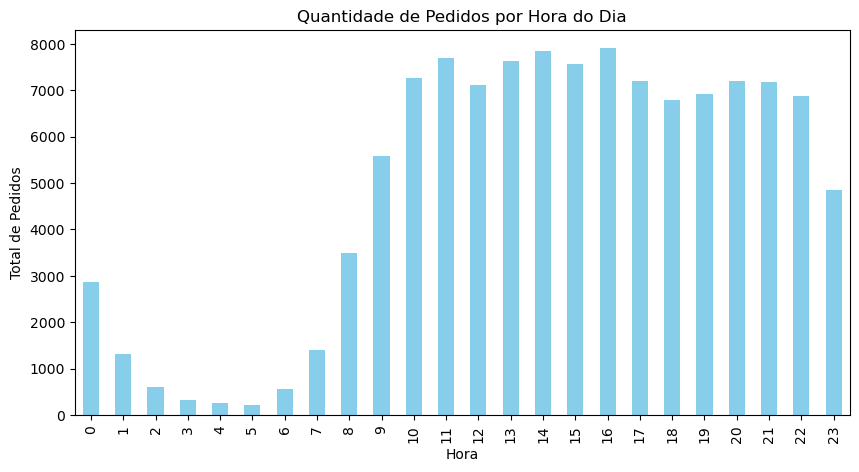

In [9]:
# Importamos a biblioteca de visualização
import matplotlib.pyplot as plt

# Criamos o agrupamento e já pedimos o gráfico de barras (kind='bar')
df.groupby('order_purchase_hour')['price'].count().plot(kind='bar', figsize=(10,5), color='skyblue')

# Colocamos títulos para ficar profissional
plt.title('Quantidade de Pedidos por Hora do Dia')
plt.xlabel('Hora')
plt.ylabel('Total de Pedidos')
plt.show()

- 11h e 14h são horários de pico secundários
- Este grafico poder ajudar a área de negócio encontrar os melhores horarios para divulgações de seus produtos

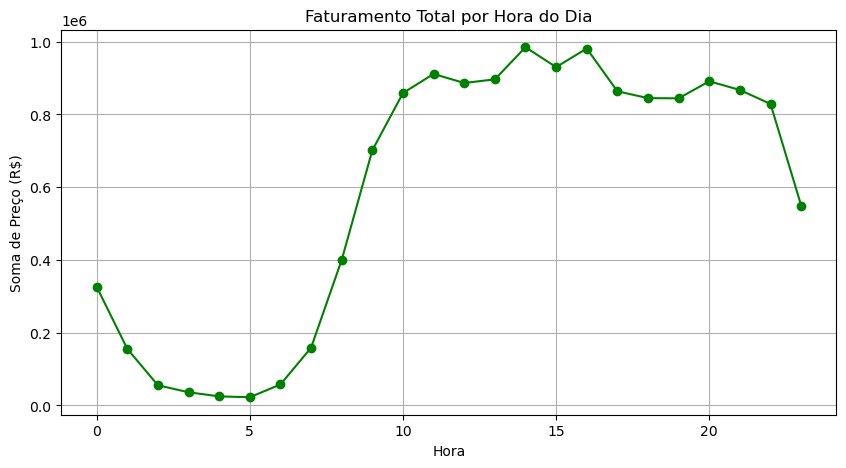

In [12]:
# Agrupando por hora, mas agora somando o preço (faturamento)
faturamento_por_hora = df.groupby('order_purchase_hour')['price'].sum()

# Criando o gráfico
faturamento_por_hora.plot(kind='line', marker='o', color='green', figsize=(10,5))

# Detalhes do gráfico
plt.title('Faturamento Total por Hora do Dia')
plt.xlabel('Hora')
plt.ylabel('Soma de Preço (R$)')
plt.grid(True) # Adiciona uma grade para facilitar a leitura
plt.show()

- As 14h lidera o faturamento com as 16h bem perto. Ou seja as 14h e 16h lideram a quantidade e o montante de compras.
- Percebe-se também que as 11h  não acompanha a quantidade de montante de dinheiro gasto como das 16h e 14h. Com isso as 11h há mais compras porém com menos volume.
- Este gráfico pode ajudar a área de negócios a entender que as 11h deve focar em anúncios de produtos de baixo custo, e às 14h/16h deve anunciar os produtos mais caros (premium).



In [15]:
# Criando uma tabela cruzada (Pivot Table)
crescimento = df.pivot_table(index='order_purchase_month', columns='order_purchase_year', values='price', aggfunc='sum')

# Exibindo a tabela
crescimento

order_purchase_year,2016,2017,2018
order_purchase_month,,,
1,NaN,128192.68,969508.79
2,NaN,252932.96,876306.08
3,NaN,390874.29,1012009.29
4,NaN,382426.56,1023400.99
5,NaN,537745.51,1026152.48
6,NaN,451076.70,907652.91
7,NaN,532670.52,921890.45
8,NaN,600610.58,880254.98
9,132.39,658124.40,145.00


- Em outubro de 2016 provavelmente foi o mês de testes da empresa e a empresa liberou as vendas em 2017 onde deu para perceber o crescimento constante da empresa de janeiro a outubro e um pico alto em novembro (Black Friday) comparado aos outros meses deste ano.
- Em junho de 2018 nota-se que começou a decair o faturamento da empresa.
